# Routing using Hill Climbing Algorithm

In [5]:
import osmnx
from optalgotools.routing import (cost, draw_route, get_child, randomized_search)
from optalgotools.structures import Node, Solution
from itertools import islice
from sys import getsizeof
from time import process_time
import matplotlib.pyplot as plt

### Set points of interest

In [6]:
# Times Square, NY as a reference
reference = (40.7577, -73.9857) # 
G = osmnx.graph_from_point(reference, dist=300, clean_periphery=True, simplify=True)

# Set up the points
origin = (40.7484, -73.9857) # Empire State Building
destination = (40.7826, -73.9656) # Central Park

# Get the osmid of the nearest nodes to the points
origin_id = osmnx.distance.nearest_nodes(G, origin[1], origin[0])
destination_id = osmnx.distance.nearest_nodes(G, destination[1], destination[0])

# Convert the source and destination nodes to Node
origin = Node(graph=G, osmid=origin_id)
destination = Node(graph=G, osmid=destination_id)

c:\Users\drala\Anaconda3\envs\ox\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
c:\Users\drala\Anaconda3\envs\ox\Lib\site-packages\osmnx\graph.py:112: FutureWarning: The clean_periphery argument has been deprecated and will be removed in the v2.0.0 release. Future behavior will be as though clean_periphery=True. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = graph_from_polygon(


### Hill climbing algorithm

In [7]:
def Hill_Climbing(G, origin, destination, n):
    time_start = process_time()  # Time tracking

    # Visualize the costs over time
    costs = []

    current = randomized_search(G, origin.osmid, destination.osmid)
    costs.append(cost(G, current))
    print("Initial cost:", costs[0])

    neighbours = list(islice(get_child(G, current), n))
    space_required = getsizeof(neighbours)
    shortest = min(neighbours, key=lambda route: cost(G, route))

    print("Initial min(children):", cost(G, shortest))
    while cost(G, shortest) < cost(G, current):
        current = shortest
        neighbours = list(islice(get_child(G, current), n))
        shortest = min(neighbours, key=lambda route: cost(G, route))
        costs.append(cost(G, current))
        print(f"Current cost:", costs[-1], "|", "min(children):", cost(G, shortest))

    route = current
    time_end = process_time()  # Time tracking
    return Solution(route, time_end - time_start, space_required, costs)

# Find the shortest route

Initial cost: 1346.172
Initial min(children): 848.897
Current cost: 848.897 | min(children): 814.419
Current cost: 814.419 | min(children): 814.354
Current cost: 814.354 | min(children): 814.377
Cost: 814.354 m
Process time: 31.28125 s
Space required: 920 bytes


Text(0.5, 0, 'Iteration')

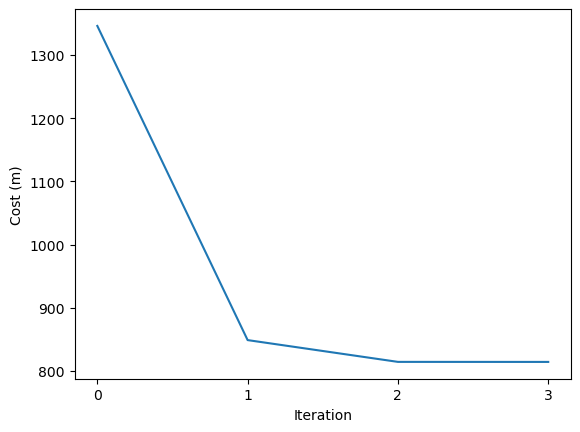

In [8]:
solution = Hill_Climbing(G, origin, destination, 100)
route = solution.result
print(f"Cost: {cost(G,route)} m")
print(f"Process time: {solution.time} s")
print(f"Space required: {solution.space} bytes")
plt.plot(solution.explored)
plt.xticks(list(range(len(solution.explored))))
plt.ylabel("Cost (m)")
plt.xlabel("Iteration")

### Draw the shortest route

In [9]:
draw_route(G,route)